In [1]:
from nrgljubljana_interface import Solver, Flat, MeshReFreqPts

Starting run with 1 MPI rank(s) at : 2020-02-04 16:31:20.714235


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Parameters
D, V, U = 1.0, 0.25, 1.0
e_f = -U/2.0 # particle-hole symmetric case
T = 1e-5

In [4]:
# Set up the Solver
S = Solver(model = "SIAM", symtype = "QS", mesh_max = 2.0, mesh_min = 1e-5, mesh_ratio = 1.01)

In [5]:
# Solve Parameters
sp = { "T": T, "Lambda": 2.0, "Nz": 4, "Tmin": 1e-6, "keep": 2000, "keepenergy": 10.0, "bandrescale": 1.0 }

In [6]:
# Model Parameters
mp = { "U1": U, "eps1": e_f }
sp["model_parameters"] = mp

In [7]:
# Initialize hybridization function
S.Delta_w['imp'] << V**2 * Flat(D)

Greens Function G_imp with mesh Point mesh of size 2454 and target_rank 2: 

In [8]:
# Solve the impurity model
S.solve(**sp)

In [9]:
print("<n>=", S.expv["n_d"])
print("<n^2>=", S.expv["n_d^2"])

('<n>=', 1.0)
('<n^2>=', 1.1194946647500001)


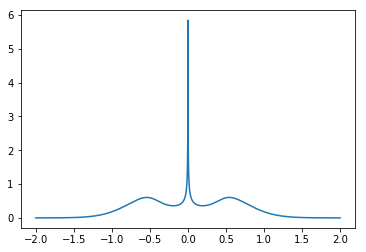

In [10]:
def A_to_nparrays(A):
    lx = np.array(list(A.mesh.values()))
    ly = np.array(A.data[:,0,0].real)
    return lx, ly

# Plot the spectral function
A_w = S.A_w['imp']
lx, ly = A_to_nparrays(A_w)
plt.plot(lx, ly)
plt.show()